## 1. Importation des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Importation des fichiers de données CSV

In [2]:
customer_df = pd.read_csv('customers.csv')
products_df = pd.read_csv('products.csv')
transactions_df = pd.read_csv('transactions.csv')

## 3. Aperçu des tables
### 3.1 Table 'customer_df'

In [3]:
customer_df.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


### 3.2 Table 'products_df'

In [4]:
products_df.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


### 3.3 Table 'transactions_df'

In [5]:
transactions_df.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


## 4. Vérification des erreurs
#### - Type de variables
#### - valeurs manquantes
#### - Doublons
### 4.1 Table 'customer_df'
#### 4.1a Type de variables

In [6]:
customer_df.dtypes

client_id    object
sex          object
birth         int64
dtype: object

#### Pas d'erreurs
#### 4.1b Valeurs manquantes

In [7]:
customer_df.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

#### Pas de valeurs manquantes
#### 4.1c Doublons

In [8]:
customer_df['client_id'].duplicated(keep=False).sum()

0

#### Pas de doublons
### 4.2 Table 'products_df'
#### 4.2a Type de variables

In [9]:
products_df.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

#### Pas d'erreurs
#### 4.2b Valeurs manquantes

In [10]:
products_df.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

#### Pas de valeurs manquantes
#### 4.2c Doublons

In [11]:
products_df['id_prod'].duplicated(keep=False).sum()

0

#### Pas de doublons
### 4.3 Table 'transactions_df'
#### 4.3a Type de variables

In [12]:
transactions_df.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

#### Date de type object -> A convertir au format date

In [13]:
transactions_df['date'] = pd.to_datetime(transactions_df["date"], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

#### 4.3b Valeurs manquantes

In [14]:
transactions_df.isnull().sum()

id_prod         0
date          200
session_id      0
client_id       0
dtype: int64

#### Aperçu des lignes sans date

In [15]:
transactions_df.loc[transactions_df['date'].isnull(), :].head()

,id_prod,date,session_id,client_id
3019,T_0,NaT,s_0,ct_0
5138,T_0,NaT,s_0,ct_0
9668,T_0,NaT,s_0,ct_1
10728,T_0,NaT,s_0,ct_0
15292,T_0,NaT,s_0,ct_0


#### Analyse 'id_prod' 'T_0'

In [16]:
products_df.loc[products_df['id_prod'] == 'T_0', :]

,id_prod,price,categ
731,T_0,-1.0,0


#### Valeur 'id_prod' négative = erreur -> A supprimer
#### Décompte du nombre de lignes sans date et 'id_prod' = 'T_0'

In [17]:
len(transactions_df[(transactions_df["date"].isnull()) & (transactions_df["id_prod"]== 'T_0')])

200

#### 200 lignes sans date et 'id_prod' =  'T_0' -> A supprimer

In [18]:
transactions_df.drop(transactions_df[transactions_df['date'].isnull()].index, inplace = True)

#### 4.3c Doublons

In [19]:
transactions_df[['id_prod', 'date', 'session_id', 'client_id']].duplicated(keep=False).sum()

0

#### Pas de doublons

## 5. Chiffre d'affaires
### 5.1 Indicateurs et graphiques

In [20]:
# Jointure des tables 'transactions_df' et 'products_df'
transactions_df = pd.merge(transactions_df, products_df, on='id_prod', how='left', indicator = True)

# Vérification de la jointure
transactions_df.loc[transactions_df['_merge'] != 'both']

,id_prod,date,session_id,client_id,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


#### 221 lignes jointure uniquement à gauche. Lignes id_prod '0_2245',  sans prix ni catégorie
#### -> vérification du nombre d'id_prod '0_2245' sans prix ni catégorie

In [21]:
transactions_df.loc[(transactions_df['id_prod'] == '0_2245') & (transactions_df['price'].isnull()) & (transactions_df['categ'].isnull()), 'id_prod'].count()

221

#### 221 lignes avec l'id_prod '0_2245' sans prix ni catégorie  : produit répertorié ? Transactions effectives ? Erreur de saisie ? --> Service des ventes à contacter pour plus de précisions.
#### Dans l'attente d'un retour et pour les besoins de l'analyse -> suppression des lignes

In [22]:
# Suppression des lignes 'id_prod' == '0_2245' 
transactions_df.drop(transactions_df[transactions_df['id_prod'] == '0_2245'].index, inplace = True)

# Déplacement des colonnes 'session_id', 'client_id', 'price' et 'categ' en position 0, 1, 3 et 4
col_1 = transactions_df.pop('session_id')
df = transactions_df.insert(0, 'session_id', col_1)
col_2 = transactions_df.pop('client_id')
df = transactions_df.insert(1, 'client_id', col_2)
col_3 = transactions_df.pop('price')
df = transactions_df.insert(3, 'price', col_3)
col_4 = transactions_df.pop('categ')
df = transactions_df.insert(4, 'categ', col_4)
transactions_df.head()

,session_id,client_id,id_prod,price,categ,date,_merge
0,s_211425,c_103,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,both
1,s_158752,c_8534,1_251,15.99,1.0,2022-02-02 07:55:19.149409,both
2,s_225667,c_6714,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,both
3,s_52962,c_6941,2_209,69.99,2.0,2021-06-24 04:19:29.835891,both
4,s_325227,c_4232,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,both


#### 5.1a Montant du chiffre d'affaires

In [23]:
CA_sum = round(transactions_df['price'].sum(), 2)
CA_sum

11853728.68

#### Le chiffre d'affaires s'élève à 11 853 729 euros.
#### 5.1b Chiffre d'affaires par produit

In [24]:
# Agrégation des produits sur la somme des CAs
product_df = transactions_df.groupby('id_prod')[['price']].sum()
product_df.reset_index(inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

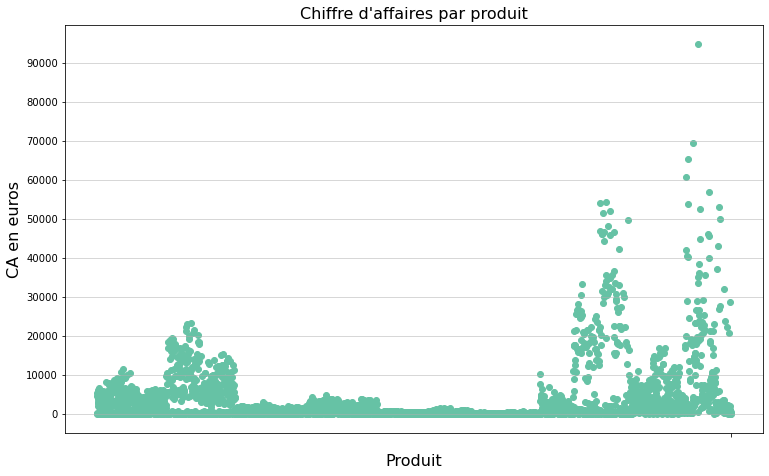

In [25]:
# Graphique
plt.figure(figsize=(12.5,7.5))
sns.set_palette('Set2')
plt.scatter(product_df['id_prod'], product_df['price'])
plt.title("Chiffre d'affaires par produit", fontsize = 16)
plt.xlabel("Produit", fontsize = 16)
plt.ylabel("CA en euros", fontsize = 16)
plt.grid(axis='y', linewidth = 0.5)
plt.xticks('id_prod', labels=" ") # Masquer les labels des produits
plt.yticks(np.arange(0, 100000, step = 10000))
plt.show

#### 5.1c Chiffre d'affaires moyen par produit

In [26]:
# Agrégation des produits
CA_product = transactions_df.groupby(['id_prod', 'categ'])[['price']].sum()
CA_product.reset_index(inplace=True)

# Renommer la colonne 'price' en 'CA'
CA_product.rename(columns={'price' : 'CA'}, inplace = True)

# Calcul du CA par produit
CA_mean = round(CA_sum / CA_product['id_prod'].count(), 2)
CA_mean

3630.54

In [27]:
CA_product.count()

id_prod    3265
categ      3265
CA         3265
dtype: int64

#### Le chiffre d'affaires moyen par produit s'élève à 3630 euros.
#### 5.1d Effectif des produits par catégorie de CA

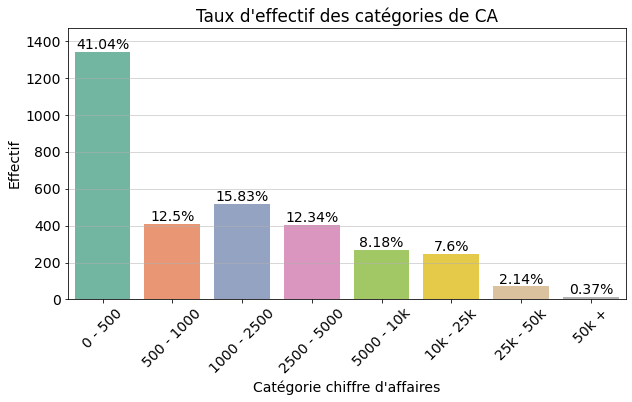

In [28]:
# Discrétisation variable 'CA'
CA_product['categ_CA'] = 0
CA_product.loc[CA_product['CA'] <= 500, 'categ_CA'] = '0 - 500'
CA_product.loc[(CA_product['CA'] > 500) & (CA_product['CA'] <= 1000), 'categ_CA'] = '500 - 1000'
CA_product.loc[(CA_product['CA'] > 1000) & (CA_product['CA'] <= 2500), 'categ_CA'] = '1000 - 2500'
CA_product.loc[(CA_product['CA'] > 2500) & (CA_product['CA'] <= 5000), 'categ_CA'] = '2500 - 5000'
CA_product.loc[(CA_product['CA'] > 5000) & (CA_product['CA'] <= 10000), 'categ_CA'] = '5000 - 10k'
CA_product.loc[(CA_product['CA'] > 10000) & (CA_product['CA'] <= 25000), 'categ_CA'] = '10k - 25k'
CA_product.loc[(CA_product['CA'] > 25000) & (CA_product['CA'] <= 50000), 'categ_CA'] = '25k - 50k'
CA_product.loc[CA_product['CA'] > 50000, 'categ_CA'] = '50k +'

# Création df trie par ordre de CA
categ_ca_sorted = CA_product.sort_values('CA')

# Créer série 'effectif_categ_ca' pour affichage taux au-dessus des barres
effectif_categ_ca = categ_ca_sorted['categ_CA'].value_counts()

# Créer série 'tx_effectif_categ_ca'
tx_effectif_categ_ca = round((effectif_categ_ca / len(categ_ca_sorted['id_prod'])) * 100, 2)
tx_effectif_categ_ca = tx_effectif_categ_ca.astype(str) +'%' # Ajout '%' au valeurs

# Trie de la série 'tx_effectif_categ_ca' pr ordre de catégorie de CA
tx_effectif_categ_ca_sorted = tx_effectif_categ_ca.reindex(['0 - 500', '500 - 1000','1000 - 2500', '2500 - 5000', '5000 - 10k', '10k - 25k', '25k - 50k', '50k +'])

# Graphique
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
CA_product_countplot = sns.countplot(x="categ_CA", data = categ_ca_sorted)
plt.xticks(rotation=45)
plt.xlabel("Catégorie chiffre d'affaires")
plt.ylabel("Effectif")
plt.title("Taux d'effectif des catégories de CA")
plt.grid(axis='y', linewidth = 0.5)

# Ajout des taux au-dessus des barres
CA_product_countplot.bar_label(CA_product_countplot.containers[0], labels = tx_effectif_categ_ca_sorted)
CA_product_countplot.margins(y=0.1) # Adapter la marge

#### 5.1e Taux du CA par catégorie de CA

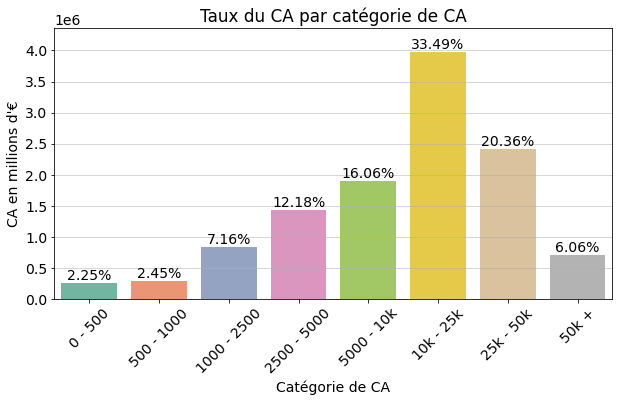

In [29]:
# Agrégation de 'categ_CA' 
tx_CA_df = categ_ca_sorted.groupby('categ_CA')[['CA']].sum()
tx_CA_df.reset_index(inplace=True)

# Créez une variable 'tx_CA'
tx_CA_df['tx_CA'] = round((tx_CA_df['CA'] / CA_sum) * 100, 2)

# Création df trie par ordre de catégorie de CA
tx_ca_sorted = tx_CA_df.reindex([0, 5, 1, 3, 6, 2, 4, 7])

# Graphique
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
tx_CA_barplot = sns.barplot(data = tx_ca_sorted, x="categ_CA", y="CA")
plt.xticks(rotation=45)
tx_CA_barplot.set(ylabel="CA en millions d'€")
tx_CA_barplot.set(xlabel='Catégorie de CA')
plt.title("Taux du CA par catégorie de CA")
plt.grid(axis='y', linewidth = 0.5)

# Créer la série de la variable 'tx_CA' pour label
tx_ca_categ = tx_ca_sorted['tx_CA']
tx_ca_categ = tx_ca_categ.astype(str) +'%' # Ajout '%' au valeurs

# Ajout des labels au-dessus des barres
tx_CA_barplot.bar_label(tx_CA_barplot.containers[0], labels = tx_ca_categ)
tx_CA_barplot.margins(y=0.1) # Adapter la marge

#### 5.1f Variance du chiffre d'affaires par produit

Distribution du chiffre d'affaires par produit :

count     3265.000000
mean      3630.544772
std       7371.925385
min          0.990000
25%        233.820000
50%        796.860000
75%       3408.600000
max      94893.500000
Name: CA, dtype: float64


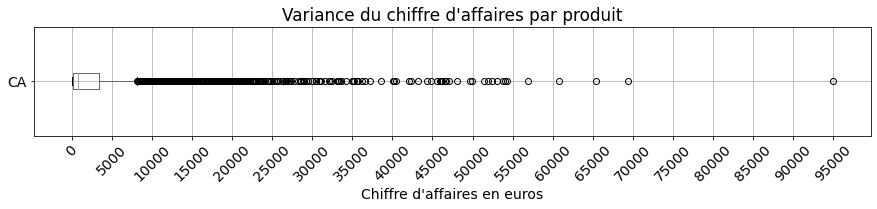

In [30]:
print("Distribution du chiffre d'affaires par produit :\n")
print(CA_product['CA'].describe())

# Boxplot
plt.figure(figsize=(15,2))
plt.rcParams.update({'font.size': 14})
CA_product.boxplot(column='CA', vert=False)
plt.xlabel("Chiffre d'affaires en euros")
plt.title("Variance du chiffre d'affaires par produit")
plt.xticks(np.arange(0, 100000, step = 5000))
plt.xticks(rotation=45)
plt.show()

#### Moyenne équivalente à Q3
#### 5.1g Mesure d'asymétrie

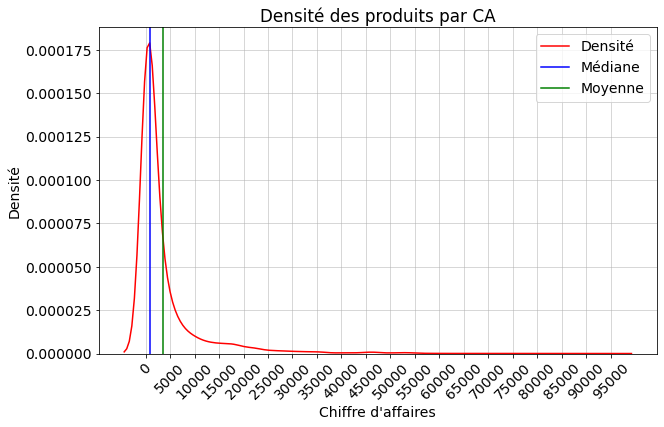

In [31]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
xmedian = np.median(CA_product['CA'])
xmean = np.mean(CA_product['CA'])
CA_product_plot = sns.kdeplot(data=CA_product, x = 'CA', color = 'red')
plt.axvline(xmedian, c='blue')
plt.axvline(xmean, c='g')
CA_product_plot.set_xticks(np.arange(0, 100000, 5000))
plt.xticks(rotation=45)
CA_product_plot.set(xlabel="Chiffre d'affaires")
CA_product_plot.set(ylabel="Densité")
plt.title("Densité des produits par CA")
plt.legend(labels = ['Densité', 'Médiane', 'Moyenne'])
plt.grid(linewidth = 0.5)

#### 5.1h Chiffre d'affaires par catégorie de produit

Taux CA catégorie 0 = 37.29 %
Taux CA catégorie 1 = 39.26 %
Taux CA catégorie 2 = 23.45 %


<AxesSubplot:xlabel='Catégorie de produits', ylabel="CA en millions d'€">

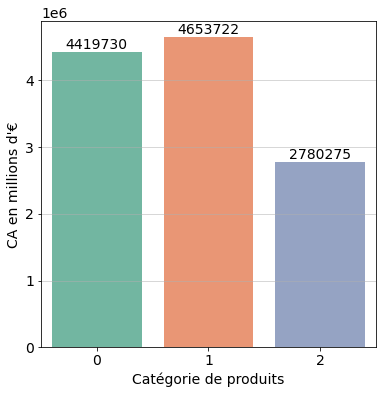

In [32]:
# Agrégation des catégories
CA_categ = transactions_df.groupby('categ')[['price']].sum()
CA_categ.reset_index(inplace=True)

# Conversion de la variable 'categ' en int
CA_categ['categ'] = CA_categ['categ'].astype(int)

# Renommer la colonne 'price' en 'CA'
CA_categ.rename(columns={'price' : 'CA'}, inplace = True)

# Diagramme à barres du CA par catégories
plt.figure(figsize=(6,6))
CA_categ_barplot = sns.set_palette('Set2')
CA_categ_barplot = sns.barplot(data=CA_categ, x='categ', y='CA')
CA_categ_barplot.set(ylabel="CA en millions d'€")
CA_categ_barplot.set(xlabel='Catégorie de produits')
plt.grid(axis='y', linewidth = 0.5)
for i in CA_categ_barplot.containers: # Affiche les valeurs au-dessus des barres
    CA_categ_barplot.bar_label(i, fmt='%d')
    
# Calcul du CA total par catégories
ca_categ_0 = CA_categ.loc[CA_categ['categ'] == 0, 'CA'].values[0]
ca_categ_1 = CA_categ.loc[CA_categ['categ'] == 1, 'CA'].values[0]
ca_categ_2 = CA_categ.loc[CA_categ['categ'] == 2, 'CA'].values[0]

# Calcul du taux de CA des catégories
tx_ca_categ_0 = round((ca_categ_0 / CA_sum) * 100, 2)
tx_ca_categ_1 = round((ca_categ_1 / CA_sum) * 100, 2)
tx_ca_categ_2 = round((ca_categ_2 / CA_sum) * 100, 2)

print('Taux CA catégorie 0 =', tx_ca_categ_0, '%')
print('Taux CA catégorie 1 =', tx_ca_categ_1, '%')   
print('Taux CA catégorie 2 =', tx_ca_categ_2, '%')   

CA_categ_barplot

### 5.2 Evolution du chiffre d'affaires
#### 5.2a Evolution du chiffre d'affaires total

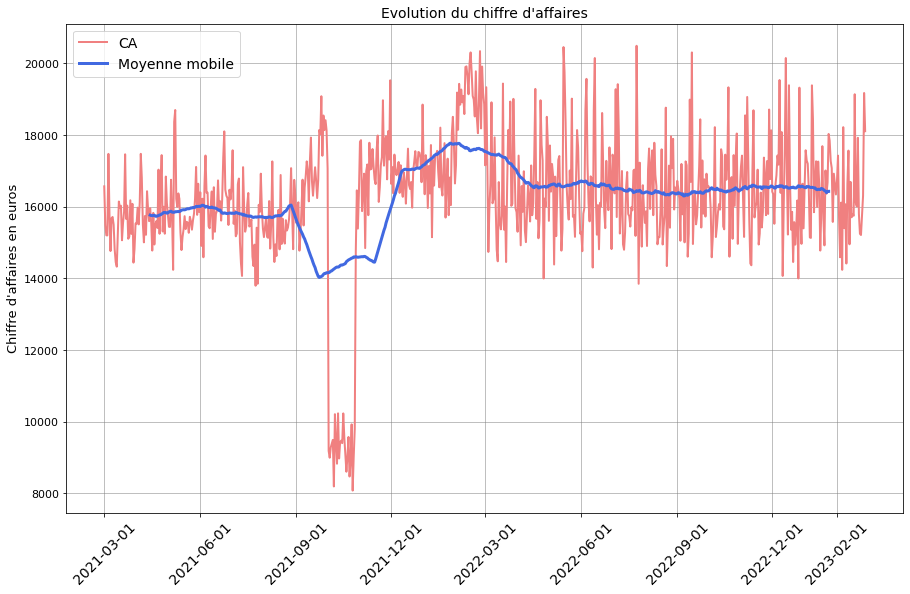

In [33]:
# Créer les variables 'année', 'mois' et année_mois'
transactions_df_2 = transactions_df.copy()
transactions_df_2['année'] = transactions_df_2['date'].dt.year
transactions_df_2['mois'] = transactions_df_2['date'].dt.month
transactions_df_2['jour'] = transactions_df_2['date'].dt.day

# Ajouter 0 aux mois et jours si len() = 1
transactions_df_2["mois"] = transactions_df_2["mois"].astype(str) # Conversion de la variable en str
transactions_df_2["mois"] = transactions_df_2["mois"].str.zfill(2) # Ajouter 0 si la valeur n'a qu'1 caractère
transactions_df_2["jour"] = transactions_df_2["jour"].astype(str) # Conversion de la variable en str
transactions_df_2["jour"] = transactions_df_2["jour"].str.zfill(2) # Ajouter 0 si la valeur n'a qu'1 caractère

# Concaténation des colonnes 'année' et 'mois'
transactions_df_2["année_mois"] = transactions_df_2['année'].astype(str) +"-"+ transactions_df_2["mois"]

# Concaténation des colonnes 'année', 'mois' et 'jour'
transactions_df_2["année_mois_jour"] = transactions_df_2['année'].astype(str) +"-"+ transactions_df_2["mois"].astype(str) +"-"+ transactions_df_2["jour"].astype(str)

# Déplacement des colonnes 'année_mois', 'année'' et 'mois'
col_5 = transactions_df_2.pop('année')
df = transactions_df_2.insert(6, 'année', col_5)
col_6 = transactions_df_2.pop('mois')
df = transactions_df_2.insert(7, 'mois', col_6)
col_7 = transactions_df_2.pop('jour')
df = transactions_df_2.insert(8, 'jour', col_7)
col_8 = transactions_df_2.pop('année_mois')
df = transactions_df_2.insert(9, 'année_mois', col_8)
col_9 = transactions_df_2.pop('année_mois_jour')
df = transactions_df_2.insert(10, 'année_mois_jour', col_9)

# Agrégation de la variable 'année_mois_jour'
evolution_CA = transactions_df_2.groupby('année_mois_jour')[['price']].sum()
evolution_CA.reset_index(inplace=True)
evolution_CA.rename(columns={'price' : 'CA'}, inplace = True)
evolution_CA = evolution_CA.sort_values('année_mois_jour')

# Créer une variable 'moyenne mobile'
evolution_CA['moyenne_mobile'] = evolution_CA.CA.rolling(80).mean().shift(-35)

# Graphique
plt.figure(figsize=(15, 9))
evolution_ca_plot = plt.plot(evolution_CA['année_mois_jour'], evolution_CA['CA'], label='CA', linewidth=2, color='lightcoral')
evolution_ca_plot = plt.plot(evolution_CA['année_mois_jour'], evolution_CA['moyenne_mobile'], label='Moyenne mobile', linewidth=3, color='royalblue')
plt.ylabel("Chiffre d'affaires en euros", fontsize=13)
plt.yticks(fontsize=11)
plt.title("Evolution du chiffre d'affaires", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(rotation=45)
plt.xticks(['2021-03-01', '2021-06-01', '2021-09-01', '2021-12-01', '2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-02-01'])
plt.legend()
plt.show()

#### 5.2b Evolution du chiffre d'affaires par catégorie

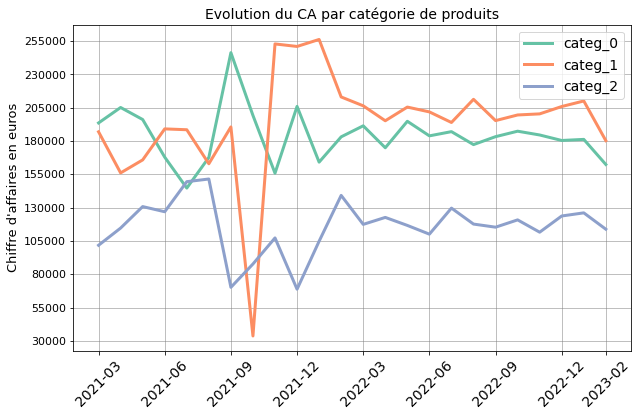

In [34]:
# Renommer les valeurs de la variable 'categ'
transactions_df_2['categ'] = transactions_df_2['categ'].astype(str)
transactions_df_2['categ'] = transactions_df_2['categ'].str[:-2]
transactions_df_2['categ'] = 'categ_' + transactions_df_2['categ'].astype(str)

# Agrégation des variables 'année_mois' et 'categ' sur la somme de la variable 'price'
transactions_df_2.groupby(['année_mois', 'categ'])['price'].sum()

# Créer un tableau à double-entrées
evolution_ca_categ = transactions_df_2.pivot_table(index='année_mois', columns='categ', values='price', aggfunc='sum')
evolution_ca_categ.reset_index(inplace=True)

# Graphique
plt.figure(figsize=(10, 6))
sns.set_palette('Set2') 
plt.plot(evolution_ca_categ['année_mois'], evolution_ca_categ['categ_0'], label='categ_0', linewidth=3)
plt.plot(evolution_ca_categ['année_mois'], evolution_ca_categ['categ_1'], label='categ_1', linewidth=3)
plt.plot(evolution_ca_categ['année_mois'], evolution_ca_categ['categ_2'], label='categ_2', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaires en euros", fontsize=13)
plt.yticks(fontsize=11)
plt.title("Evolution du CA par catégorie de produits", fontsize=14)
# plt.xticks(['2021-03','2021-06','2021-09', '2021-12'], fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(rotation=45)
plt.yticks(np.arange(30000, 275000, step = 25000))
plt.xticks(['2021-03', '2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09', '2022-12', '2023-02'])
plt.show()

#### 5.2c Distribution empirique du CA par mois

In [35]:
# Agrégation de la variable 'année_mois'
evolution_CA_mois = transactions_df_2.groupby('année_mois')[['price']].sum()
evolution_CA_mois.reset_index(inplace=True)
evolution_CA_mois.rename(columns={'price' : 'CA'}, inplace = True)
evolution_CA_mois = evolution_CA_mois.sort_values('année_mois')

# Calcul CA 2021-2002
CA_2021_2022 = evolution_CA_mois.iloc[:12, 1].sum()

# Calcul CA 2022-2023
CA_2022_2023 = evolution_CA_mois.iloc[-12:, 1].sum()

# Calcul taux de croissance de 2021 à 2023
croissance_2021_2023 = round(((CA_2022_2023 - CA_2021_2022) / CA_2021_2022) * 100, 2)

print(evolution_CA_mois['CA'].describe())
print('\nMoyenne CA par mois =',int(evolution_CA_mois['CA'].mean()), '€')
print('CA max = 2022-01 =',int(evolution_CA_mois['CA'].max()), '€')
print('CA min = 2021-10 =',int(evolution_CA_mois['CA'].min()), '€')
# print('CA 2021-2022 =', CA_2021_2022, '€')
# print('CA 2022-2023 =', CA_2022_2023, '€')
# print('Croissance de 2021 à 2023 =', croissance_2021_2023, '%')

count        24.000000
mean     493905.361667
std       41208.740111
min      320798.740000
25%      483775.270000
50%      501566.105000
75%      515634.330000
max      535571.500000
Name: CA, dtype: float64

Moyenne CA par mois = 493905 €
CA max = 2022-01 = 535571 €
CA min = 2021-10 = 320798 €


#### Moyenne CA mensuel = 493 905 €
#### CA max mensuel = 2022-22 = 535 570 €
#### CA min mensuel = 2021-10 = 320 800 €
#### 5.2d Analyse de la chute du CA de 2021-10

Nombre de ventes mensuel moyen des produits de catégorie 1 = 9465.375
Nombre de ventes des produits de catégorie 1 au 2021-10 = 1666
Taux de croissance du CA de 2021-10 par rapport au CA moyen des produits de catégorie 1 = -82.4%


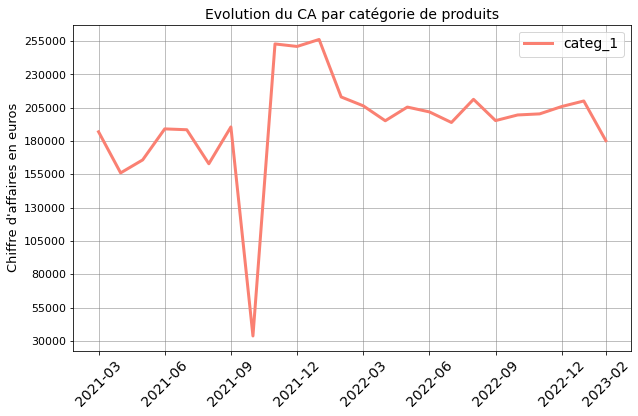

In [36]:
# Créer un tableau à double-entrées du nombre de ventes de produits par catégorie de produits
nbre_ventes_categ = transactions_df_2.pivot_table(index='année_mois', columns='categ', values='session_id', aggfunc='count')
nbre_ventes_categ.reset_index(inplace=True)

# Nombre de ventes moyen mensuel des produits de catégorie 1
mean_nb_ventes_cat_1 = nbre_ventes_categ['categ_1'].mean()

# Nombre de ventes des produits de catégorie 1 au 2021-10
nb_ventes_cat_1_202110 = nbre_ventes_categ.loc[nbre_ventes_categ['année_mois'] == '2021-10', 'categ_1'].values[0]

# Taux du CA de 2021-10 par rapport au CA moyen des produits de catégorie 1
tx_ca_202110 = (round(((nb_ventes_cat_1_202110 - mean_nb_ventes_cat_1) / mean_nb_ventes_cat_1) * 100, 2)).astype(str) + '%'

print('Nombre de ventes mensuel moyen des produits de catégorie 1 =', mean_nb_ventes_cat_1)
print('Nombre de ventes des produits de catégorie 1 au 2021-10 =', nb_ventes_cat_1_202110)
print('Taux de croissance du CA de 2021-10 par rapport au CA moyen des produits de catégorie 1 =', tx_ca_202110)

# Graphique
plt.figure(figsize=(10, 6))
sns.set_palette('Set2') 
plt.plot(evolution_ca_categ['année_mois'], evolution_ca_categ['categ_1'], label='categ_1', linewidth=3, color='salmon')
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaires en euros", fontsize=13)
plt.yticks(fontsize=11)
plt.title("Evolution du CA par catégorie de produits", fontsize=14)
# plt.xticks(['2021-03','2021-06','2021-09', '2021-12'], fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(rotation=45)
plt.yticks(np.arange(30000, 275000, step = 25000))
plt.xticks(['2021-03', '2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09', '2022-12', '2023-02'])
plt.show()

#### En octobre 2021, il y a eu 1666 ventes de produits de catégorie 1 pour une moyenne mensuelle de 9 465 ventes, soit une chute du nombre des ventes de 82 %.

In [37]:
# Création du dataframe des transactions des produits de catégorie 1 du mois 2021-10
transactions_202110_df = transactions_df_2.loc[(transactions_df_2['categ'] == 'categ_1') & (transactions_df_2['année_mois'] == '2021-10')].sort_values('année_mois_jour')

# Agrégation de la variable 'année_mois_jour' sur la somme de 'price' et le nombre de 'session_id'
evolution_ca_202110 = transactions_202110_df.groupby('année_mois_jour').agg({'price' : 'sum', 'session_id' : 'count'})
evolution_ca_202110.reset_index(inplace = True)
evolution_ca_202110.rename(columns ={'session_id' : 'nombre_ventes'}, inplace = True)
evolution_ca_202110

,année_mois_jour,price,nombre_ventes
0,2021-10-01,7003.79,344
1,2021-10-28,6317.99,316
2,2021-10-29,6425.18,326
3,2021-10-30,6753.69,338
4,2021-10-31,7261.67,342


#### Aucune donnée du 2 au 27 octobre -> Chute du chiffre d'affaires

#### 5.2e Tops 3 et flops 3 des CAs par produit et des nombres de ventes

In [38]:
# Agrégation de la variable 'id_prod' sur la variable 'price'
id_prod_df = transactions_df.groupby('id_prod')['price'].agg(['sum', 'count'])
id_prod_df.reset_index(inplace=True)
id_prod_df.rename(columns={'sum':'CA', 'count':'nombre_ventes'}, inplace = True)

print('Nombre de produits dont vente = 1 :\n',id_prod_df.loc[id_prod_df['nombre_ventes'] == 1].count())

# Trie décroissant par nombre de ventes
id_prod_df = id_prod_df.sort_values('nombre_ventes', ascending=False)
display(id_prod_df)

Nombre de produits dont vente = 1 :
 id_prod          18
CA               18
nombre_ventes    18
dtype: int64


,id_prod,CA,nombre_ventes
2591,1_369,54025.48,2252
2644,1_417,45947.11,2189
2641,1_414,51949.40,2180
2733,1_498,49731.36,2128
2653,1_425,35611.04,2096
...,...,...,...
313,0_1284,1.38,1
1792,0_549,2.99,1
549,0_1498,2.48,1
1784,0_541,1.99,1


#### Top 3 des ventes, 3 produits de catégorie 1 :
#### - 1_369 avec 2252 ventes
#### - 1_417 avec 2189 ventes
#### - 1_414 avec 2180 ventes
#### Flop 3 des ventes, 3 produits de catégorie 0  :
#### - 0_886 avec 1 vente
#### - 0_541 avec 1 vente
#### - 0_1498 avec 1 vente

In [39]:
# Trie décroissant par CA
id_prod_df = id_prod_df.sort_values('CA', ascending=False)
display(id_prod_df)

,id_prod,CA,nombre_ventes
3096,2_159,94893.50,650
3070,2_135,69334.95,1005
3045,2_112,65407.76,968
3034,2_102,60736.78,1027
3152,2_209,56971.86,814
...,...,...,...
2079,0_807,1.99,1
1784,0_541,1.99,1
719,0_1653,1.98,2
313,0_1284,1.38,1


#### Top 3 des CAs, 3 produits de catégorie 2  :
#### - 2_159 avec 94 893 euros
#### - 2_135 avec 69 335 euros
#### - 2_112 avec 65 408 euros
#### Flop 3 des CAs, 3 produits de catégorie 0 :
#### - 0_1539 avec 1 euros
#### - 0_1284 avec 1.5 euros
#### - 0_1653 avec 2 euros
------------------------------------------------
## 6. Profil des clients
### 6.1 Profil en fonction de l'âge
#### 6.1a Distribution

In [40]:
customer_df['age'] = 2023 - customer_df['birth']
customer_df['age'].describe()

count    8623.000000
mean       44.719123
std        16.919535
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age, dtype: float64

#### Âge moyen = 45 ans
#### Client le plus jeune = 19 ans
#### Client le plus âgé = 94 ans

#### 6.1b Densité

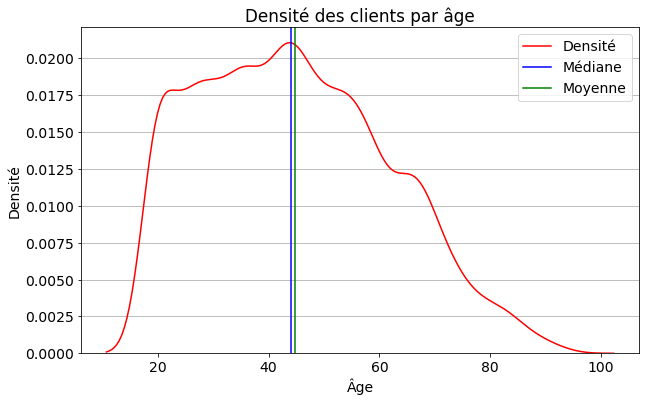

In [41]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
age_median = np.median(customer_df['age'])
age_mean = np.mean(customer_df['age'])
sns.kdeplot(data=customer_df, x = 'age', color = 'red')
plt.axvline(age_median, c ='blue')
plt.axvline(age_mean, c='g')
plt.title('Densité des clients par âge')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.legend(labels = ['Densité', 'Médiane', 'Moyenne'])
plt.grid(axis='y')

#### 6.1c Chiffre d'affaires par âge

In [42]:
# Jointure des tables 'transactions_df_2' et 'customer_df'
transactions_df_2.drop(columns = '_merge', inplace = True) # Supression de la colonne existante '_merge'
transactions_df_2 = pd.merge(transactions_df_2, customer_df, on = 'client_id', how = 'left', indicator = True)
transactions_df_2.reset_index(inplace = True)

# Vérification de la jointure
transactions_df_2.loc[transactions_df_2['_merge'] != 'both']

,index,session_id,client_id,id_prod,price,categ,date,année,mois,jour,année_mois,année_mois_jour,sex,birth,age,_merge


#### Pas d'erreur dans la jointure

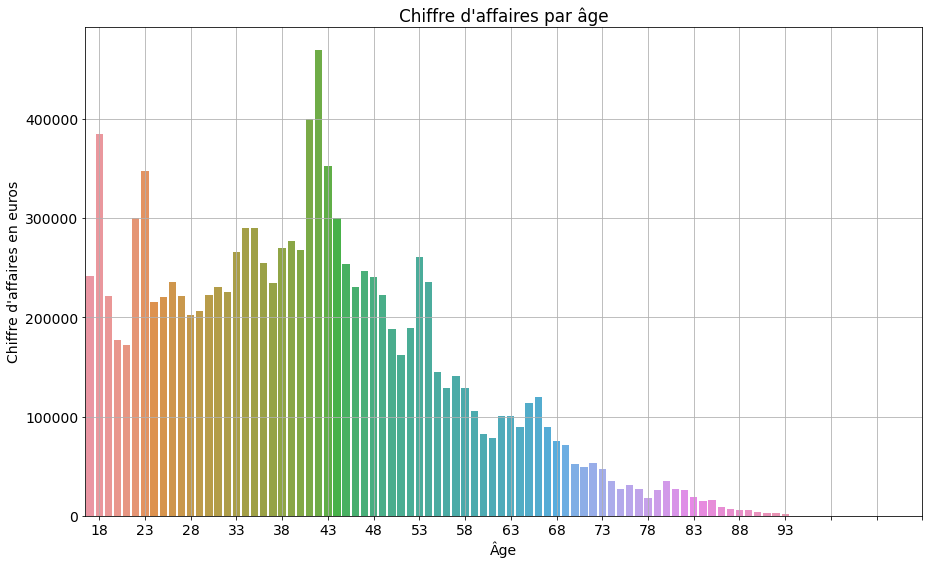

In [43]:
# Corriger variable 'age' par 'année' - 'birth'
transactions_df_2['age'] = transactions_df_2['année'] - transactions_df_2['birth']

# Agrégation des âges sur le chiffre d'affaires
ca_age_df = transactions_df_2.groupby('age')[['price']].sum()
ca_age_df.reset_index(inplace = True)
ca_age_df.rename(columns ={'price' : 'CA'}, inplace = True)

# Graphique
plt.figure(figsize=(15 ,9))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
ca_age_barplot = sns.barplot(data=ca_age_df, x = 'age', y = 'CA')
plt.xticks(np.arange(0+1, 95, 5))
ca_age_barplot.set(xlabel='Âge')
ca_age_barplot.set(ylabel="Chiffre d'affaires en euros")
plt.title("Chiffre d'affaires par âge")
plt.grid()

### 6.2 Profil en fonction du genre
#### 6.2a Effectif et répartition

In [44]:
# Agrégation des genres sur l'effectif
sex_df = customer_df.groupby('sex')[['sex']].count()
sex_df.rename(columns = {'sex' : 'effectif'}, inplace = True)
sex_df.reset_index(inplace = True)
sex_df['taux_effectif'] = round((sex_df['effectif'] / sex_df['effectif'].sum()) * 100, 2).astype(str) + '%' 
sex_df.head()

,sex,effectif,taux_effectif
0,f,4491,52.08%
1,m,4132,47.92%


#### 52 % des clients sont des femmes et 48 % des hommes
#### 6.2b Graphique de répartition

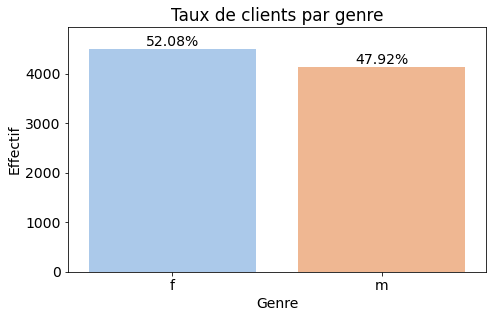

In [45]:
plt.figure(figsize=(7.5, 4.5))
sns.set_palette('pastel')
tx_genre = sns.countplot(x=customer_df['sex'])
plt.ylabel('Effectif')
plt.xlabel('Genre')
plt.title('Taux de clients par genre')

# Ajout des taux au-dessus des barres
tx_genre.bar_label(tx_genre.containers[0], labels = sex_df['taux_effectif'])
tx_genre.margins(y=0.1) # Adapter la marge

### 6.3 Chiffre d'affaires par clients
#### 6.3a Répartition


Indice de Gini = 0.44638654137401435


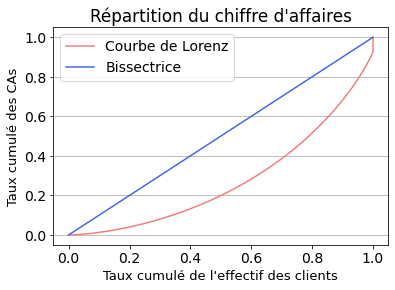

In [46]:
# Agrégation des clients sur la variable 'price'
ca_customers_df = transactions_df_2.groupby('client_id')[['price']].sum()
ca_customers_df.reset_index(inplace = True)
ca_customers_df.rename(columns = {'price' : 'CA'}, inplace = True)

# Courbe de Lorenz
ca = ca_customers_df['CA']
ca_values = ca_customers_df['CA'].values
n = len(ca_values)

lorenz = np.cumsum(np.sort(ca_values)) / ca_values.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'Courbe de Lorenz', color = 'lightcoral')

# Tracer la bissectrice
plt.plot([0,1], [0,1], label = 'Bissectrice', color = 'royalblue')

plt.legend(loc='upper left')
plt.title("Répartition du chiffre d'affaires")
plt.xlabel("Taux cumulé de l'effectif des clients", fontsize=13)
plt.ylabel("Taux cumulé des CAs", fontsize=13)
plt.grid(axis = 'y')

# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('\nIndice de Gini =', gini)

plt.show()

#### Indice de Gini = 0.45 -> Répartition peu égalitaire
#### 20 % des clients constituent la moitié du chiffre d'affaires.
#### 50 % des clients constituent 20 % du chiffre d'affaires.
#### Une poignée de clients constituent 10 % du chiffre d'affaires.

#### 6.3b Top des clients

In [47]:
ca_customers_df = ca_customers_df.sort_values('CA', ascending = False)
ca_customers_df.head(10)

,client_id,CA
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153598.92
2724,c_3454,113637.93
2513,c_3263,5276.87
634,c_1570,5271.62
2108,c_2899,5214.05
1268,c_2140,5208.82
7006,c_7319,5155.77
7715,c_7959,5085.45


In [48]:
customer_df.loc[(customer_df['client_id'] == 'c_1609') | (customer_df['client_id'] == 'c_4958') | (customer_df['client_id'] == 'c_6714') | (customer_df['client_id'] == 'c_3454')]

,client_id,sex,birth,age
1378,c_4958,m,1999,24
1911,c_6714,f,1968,55
3642,c_1609,m,1980,43
8088,c_3454,m,1969,54


#### Top 1 client : c_1609, genre m, 43 ans, 324 033 € de CA
#### Top 2 client : c_4958, genre m, 24 ans, 289 760 € de CA
#### Top 3 client : c_6714, genre f, 55 ans, 153 600 € de CA
#### Top 4 client : c_3454, genre m, 54 ans, 113 637 € de CA
-----------------------

## 7. Analyse des liens entre les variables
### 7.1 Lien entre le genre des clients et les catégories des livres achetés

Manque de données du mois d'octobre 2021 pour la catégorie 1 --> Suppression des transactions du mois d'octobre 2021 pour toutes les catégories pour conserver le même nombre de jours de transactions pour toutes les catégories

4 clients sans genre ni âge car entreprises et/ou institutions culturelles ou éducatives --> Suppression de ces 4 clients pour l'analyse des liens sur le profil des clients

In [49]:
# Suppression des 4 clients les plus importants car entreprises
transactions_df_3 = transactions_df_2.copy()
index_transactions = transactions_df_3[(transactions_df_3['client_id'] == 'c_1609') | (transactions_df_3['client_id'] == 'c_6714') | (transactions_df_3['client_id'] == 'c_3454') | (transactions_df_3['client_id'] == 'c_4958')].index
transactions_df_3.drop(index_transactions, inplace = True)

# Supression du mois 2021-10 pour toutes les catégories
index_2_transactions = transactions_df_3[transactions_df_3['année_mois'] == '2021-10'].index
transactions_df_3.drop(index_2_transactions, inplace = True)

Question : Est-ce que le genre des clients a une influence sur les catégories de livres achetés ?

H0 = Pas de différence entre les genres, pas de corrélation

H1 = Différence entre les genres, corrélation

Type de test statistique : Association entre 2 variables qualitatives sur 2 échantillons indépendants

#### --> Test du khi-2

(18.749695983469746, 8.48311292992366e-05, 2, array([[192594.45687199, 109755.15820979,  16548.38491822],
       [177269.54312801, 101021.84179021,  15231.61508178]])) 

p-value = 8.48311292992366e-05


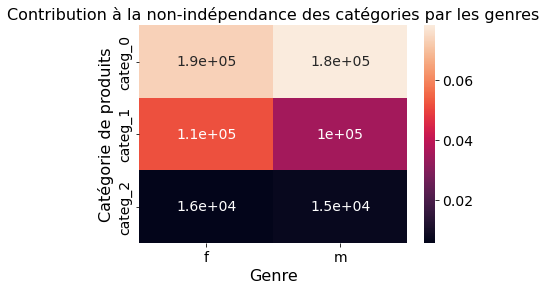

In [50]:
# Tableau de contingence
# Créer deux variables x et y
x = 'categ'
y = 'sex'

# Création tableau double-entrées
cont = transactions_df_3[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")

# Heatmap
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transactions_df_2)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.xlabel('Genre', fontsize = 16)
plt.ylabel('Catégorie de produits', fontsize = 16)
plt.title('Contribution à la non-indépendance des catégories par les genres', fontsize = 16)

#Suppression de la ligne et de la colonne 'Total' de la table 'cont'
cont.drop(columns='Total', inplace = True)
cont.drop('Total', inplace = True)

# Test du khi-2
from scipy.stats import chi2_contingency
obs = cont['f'], cont['m']
res = chi2_contingency(obs)
print(res, '\n\np-value = 8.48311292992366e-05')

plt.show()

#### P-value = 8.48311292992366e-05 -> < 0.05 -> Hypothèse nulle largement rejetée --> Corrélation établie
---------------------------------------------------------------------------
### 7.2 Lien entre l'âge des clients et le montant total des achats
Question : Est-ce que l'âge des clients a une influence sur le montant total des achats ?

H0 = l'âge n'a pas de lien sur le montant total des achats --> pas de corrélation

H1 = l'âge a un lien sur le montant total des achats --> corrélation

Type de test statistique --> Association entre 2 variables quantitatives

Répartition du CA par clients peu égalitaire --> Distribution ne suit pas une loi normale --> Test non-paramétrique

#### --> Test de corrélation de Spearman

Coefficient r de Spearman = -0.8798669684745634
p-value = 2.8713159220099096e-26


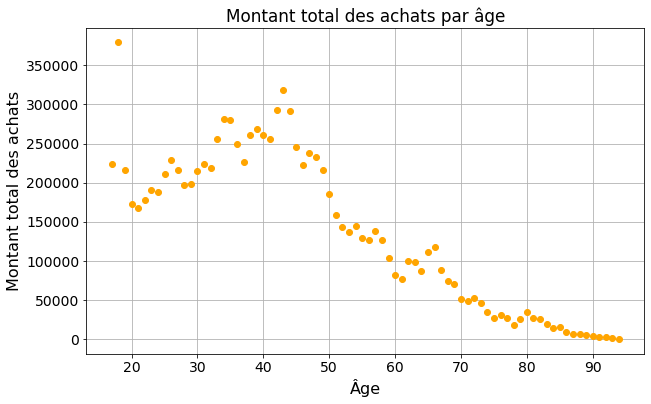

In [51]:
# Agrégation de la variable 'age' sur la somme de la variable 'price'
age_sum_price = transactions_df_3.groupby('age')[['price']].sum()
age_sum_price.reset_index(inplace = True)
age_sum_price.rename(columns = {'price' : 'CA'}, inplace = True)

# Scatterplot
plt.figure(figsize = (10, 6))
plt.plot(age_sum_price["age"],age_sum_price["CA"],'o', color ='orange')
plt.xlabel("Âge", fontsize = 16)
plt.ylabel("Montant total des achats", fontsize = 16)
plt.title("Montant total des achats par âge")
plt.grid()

# Test de corrélation de Spearman
from scipy import stats

coef, p = stats.spearmanr(age_sum_price["age"], age_sum_price["CA"])
print('Coefficient r de Spearman =', coef)
print('p-value =', p)

plt.show()

#### Coefficient r de Spearman = - 0.88 --> Courbe décroissante proche de -1 = Forte corrélation linéaire
#### p-value très proche de 0 --> Hypothèse nulle largement rejetée, test significatif
-----------
### 7.3 Lien entre l'âge des clients et la fréquence d'achats
Question : Est-ce que l'âge des clients a une influence sur la fréquence d'achats ?

H0 = l'âge n'a pas de lien sur la fréquence d'achats --> pas de corrélation

H1 = l'âge a un lien sur la fréquence d'achats --> corrélation

Type de test statistique --> Association entre 2 variables quantitatives

Densité des clients par âge --> Distribution ne suit pas une loi normale --> Test non-paramétrique

#### --> Coefficient de Spearman

Coefficient r de corrélation de Spearman = -0.6898291581835885
p-value = 2.8463676631567095e-12


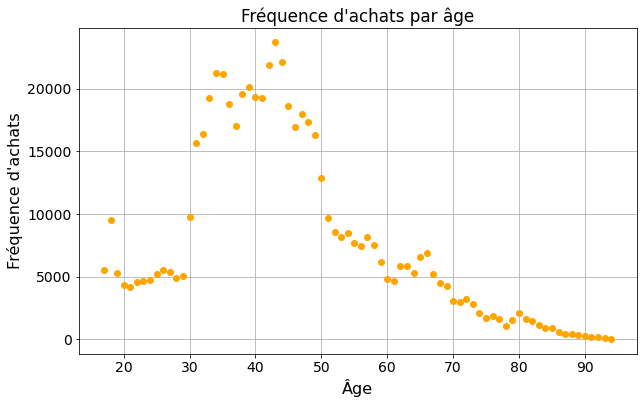

In [52]:
# Agrégation de la variable 'age' sur le nombre de 'session_id'
age_session_count = transactions_df_3.groupby('age')[['session_id']].count()
age_session_count.reset_index(inplace = True)
age_session_count.rename(columns ={'session_id':'frequence_achats'}, inplace = True)
age_session_count = age_session_count.sort_values('frequence_achats')

# Scatterplot
plt.figure(figsize = (10, 6))
plt.plot(age_session_count["age"],age_session_count["frequence_achats"],'o', color = 'orange')
plt.xlabel("Âge", fontsize = 16)
plt.ylabel("Fréquence d'achats", fontsize = 16)
plt.title("Fréquence d'achats par âge")
plt.grid()

# Test de corrélation de Spearman
coef, p = stats.spearmanr(age_session_count['age'], age_session_count['frequence_achats'])
print('Coefficient r de corrélation de Spearman =', coef)
print('p-value =', p)

plt.show()

#### Coefficient r de Spearman = - 0.69 --> Corrélation linéaire modérée
#### p-value très proche de 0 --> Hypothèse nulle largement rejetée, test significatif
-----------
### 7.4 Lien entre l'âge des clients et la taille du panier moyen
Question : Est-ce que l'âge des clients a une influence sur la taille du panier moyen ?

H0 = l'âge n'a pas de lien sur la taille du panier moyen --> pas de corrélation

H1 = l'âge a un lien sur la taille du panier moyen --> corrélation

Type de test statistique --> Association entre 2 variables quantitatives

Densité des clients par âge --> Distribution ne suit pas une loi normale --> Test non-paramétrique

#### --> Coefficient de Spearman

Coefficient r de corrélation de Spearman = -0.08400460299194476
p-value = 0.46464216419871074


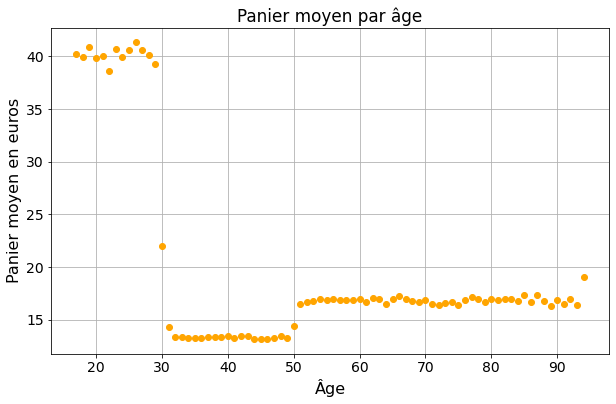

In [53]:
# Agrégation de la variable 'age' sur la moyenne de la variable 'price'
age_price_mean = transactions_df_3.groupby('age')[['price']].mean()
age_price_mean.reset_index(inplace = True)
age_price_mean.rename(columns = {'price' : 'panier_moyen'}, inplace = True)

# Scatterplot
plt.figure(figsize = (10, 6))
plt.plot(age_price_mean["age"],age_price_mean["panier_moyen"],'o', color ='orange')
plt.xlabel("Âge", fontsize = 16)
plt.ylabel("Panier moyen en euros", fontsize = 16)
plt.title("Panier moyen par âge")
plt.grid()

# Test de corrélation de Spearman
coef, p = stats.spearmanr(age_price_mean['age'], age_price_mean['panier_moyen'])
print('Coefficient r de corrélation de Spearman =', coef)
print('p-value =', p)

plt.show()

#### Coefficient r de Spearman = - 0.08 --> Proche de 0, pas de corrélation linéaire
#### p-value = 0.46  --> > 5% --> Hypothèse nulle retenue, test non significatif
---------------
### 7.5 Lien entre l'âge des clients et les catégories de livres achetés
Question : Est-ce que l'âge des clients a une influence sur les catégories de livres achetés ?

H0 = l'âge n'a pas de lien sur les catégories de livres achetés --> pas de corrélation

H1 = l'âge a un lien sur les catégories de livres achetés --> corrélation

Type de test statistique --> Comparaison de 3 variables sur un même échantillon

Densité des clients par âge --> Distribution ne suit pas une loi normale --> Test non-paramétrique

#### --> Test de Friedman

p-value = 9.149353886815886e-14


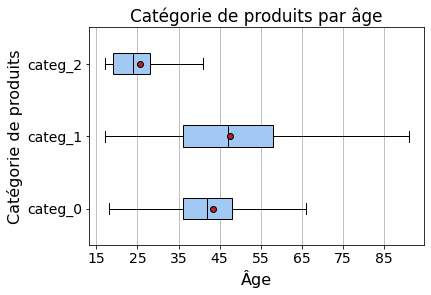

In [54]:
# Propriétés graphiques   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
# Graphique
X = 'categ'
Y = 'age'

modalites = transactions_df_3[X].unique()
groupes = []

for m in modalites:
    groupes.append(transactions_df_3[transactions_df_3[X]==m][Y])
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Âge', fontsize = 16)
plt.ylabel('Catégorie de produits', fontsize = 16)
plt.title('Catégorie de produits par âge')
plt.xticks(np.arange(15, 95, 10))
plt.grid(axis = 'x')

# Tableau à double-entrée pour calcul de la p-value de chaque catégorie de produits
age_categ_df = transactions_df_3.pivot_table(index='age', columns='categ', values='session_id', aggfunc='count')
age_categ_df.reset_index(inplace = True)

# Vérifier les valeurs manquantes
age_categ_df.isnull().sum()

# Remplacer la valeur manquante par 0
age_categ_df.loc[age_categ_df['categ_2'].isnull(), 'categ_2'] = 0

# Test de Friedman
coef, p = stats.friedmanchisquare(age_categ_df['categ_0'], age_categ_df['categ_1'], age_categ_df['categ_2'])
print('p-value =', p)

plt.show()

#### p-value très proche de 0 --> Hypothèse nulle largement rejetée --> corrélation établie